# Deep Learning for NLP: Sentiment Analysis

Natural Language Processing (NLP) is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages [Source](https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1).

It is a discipline that focuses on the interaction between data science and human language, and is scaling to lots of industries. Today NLP is booming thanks to the huge improvements in the access to data and the increase in computational power, which are allowing practitioners to achieve meaningful results in areas like healthcare, media, finance and human resources, among others.

One of the most important applications in NLP is sentiment analysis. Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within text, whether a whole document, paragraph, sentence, or clause.

Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before. By automatically analyzing customer feedback, from survey responses to social media conversations, brands are able to listen attentively to their customers, and tailor products and services to meet their needs.

In this tutorial, we are going to discuss how to implement sentiment analysis. Firstly, we need to gain an understanding of what is sentiment analysis.

## What is Sentiment Analysis?

In particular, when we talk about sentiment analysis nowadays, we refer to the sentiment analysis with machine learning techniques. A sentiment analysis task is usually modeled as a classification problem, whereby a classifier is fed a text and returns a category, e.g. positive, negative, or neutral.

Here’s how a machine learning classifier can be implemented:

![Sentiment Analysis](https://miro.medium.com/max/351/1*jBxNVEethCnoR7LHqp9yRg.png)

In the following sections we are going to explain the respective steps in the figure above.

### The Training and Prediction Processes
In the training process (a), our model learns to associate a particular input (i.e. a _sentence_ or _paragraph_) to the corresponding output (_tag_ meaning sentiment) based on the training samples used for training. The feature extractor transfers the each text input (again, a sentence or paragraph) into a __feature vector__. Pairs of feature vectors and tags (e.g. _positive, negative_, or _neutral_) are then fed into the machine learning algorithm to generate a model.

In the prediction process (b), the feature extractor is used to transform unseen text inputs (test set) into feature vectors. These feature vectors are then fed into the model, which generates predicted tags (again, _positive, negative_, or _neutral_).

### Feature Extraction from Text
The first step in a machine learning text classifier is to transform the text extraction or text vectorization, and the classical approach has been bag-of-words or bag-of-ngrams with their frequency.

More recently, new feature extraction techniques have been applied based on word embeddings (also known as word vectors [word2vec](https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa)). This kind of representations makes it possible for words with similar meaning to have a similar representation, which can improve the performance of classifiers.

You can refer to more details regarding sentiment analysis [here](https://monkeylearn.com/sentiment-analysis/).

## Implementation with the IMDB Dataset

In this post, you will discover how you can predict the sentiment of movie reviews as either positive or negative in Python using the Keras deep learning library.

After reading this post you will know:

- About the IMDB sentiment analysis problem for natural language processing and how to load it in Keras.
- How to use word embedding in Keras for natural language problems.
- How to develop and evaluate a multi-layer perception model for the IMDB problem.
- How to develop a one-dimensional convolutional neural network model for the IMDB problem.

### Overview of the Dataset and the Classification Problem

The dataset is the Large Movie Review Dataset often referred to as the IMDB dataset, which is now provided with `keras`.

The Large Movie Review Dataset (often referred to as the IMDB dataset) contains 25,000 highly polar moving reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.

The data was collected by Stanford researchers and was used in a 2011 paper [PDF](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf) where a split of 50/50 of the data was used for training and test. An accuracy of 88.89% was achieved.

The data was also used as the basis for a Kaggle competition titled “[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)” in late 2014 to early 2015. Accuracy was achieved above `97%` with winners achieving `99%`.

### Loading the IMDB Dataset

The `keras.datasets.imdb.load_data()` allows you to load the dataset in a format that is ready for use in neural network and deep learning models.

The words have been replaced by integers that indicate the absolute popularity of the word in the dataset. The sentences in each review are therefore comprised of a sequence of integers. In other words, the original text data is already represented as numbers.

Calling `imdb.load_data()` the first time will download the IMDB dataset to your computer and store it in your home directory under `~/.keras/datasets/imdb.pkl` as a 32 megabyte file.

Usefully, the `imdb.load_data()` provides additional arguments including the number of top words to load (where words with a lower integer are marked as zero in the returned data), the number of top words to skip (to avoid stopwords like “the”‘s) and the maximum length of reviews to support.

Let’s load the dataset and calculate some properties of it. We will start off by loading some libraries and loading the entire IMDB dataset as a training dataset.

In [ ]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


In [ ]:

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# summarize size
print("Training data: ")
print(X.shape[0], 'rows')
print(y.shape[0], 'labels')

17465344/17464789 [==============================] - 1s 0us/step
Training data: 
50000 rows
50000 labels


We can also print the unique class values. We can see that it is a binary classification problem for good and bad sentiment in the review.

In [ ]:
# Summarize number of classes
# 0: negative; 1: positive
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


Next we can get an idea of the total number of unique words in the dataset. Interestingly, we can see that there are just under 100,000 words across the entire dataset.

In [ ]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Finally, we can get an idea of the average review length. We can see that the average review has just around `234` words with a standard deviation of around `173` words.

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Review length: 
Mean 234.76 words (172.911495)


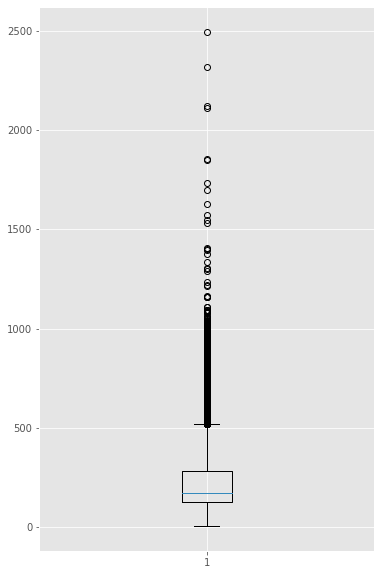

In [ ]:
# plot review length
plt.figure(figsize=(6,10))
plt.boxplot(result)
plt.show()

### Word Embedding
A recent breakthrough in the field of natural language processing is called [word embedding](https://en.wikipedia.org/wiki/Word_embedding).

This is a technique where words are encoded as real-valued vectors in a high-dimensional space, where the similarity between words in terms of meaning translates to closeness in the vector space.

Discrete words are mapped to vectors of continuous numbers. This is useful when working with natural language problems with neural networks and deep learning models are we require numbers as input.

Keras provides a convenient way to convert positive integer representations of words into a word embedding by an `Embedding` layer.

The layer takes arguments that define the mapping including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value that will be seen as an integer). The layer also allows you to specify the dimensionality for each word vector, called the output dimension.

We would like to use a word embedding representation for the IMDB dataset.

We will load our data (again) using the following settings:
- Let’s say that we are only interested in the first 5,000 most used words in the dataset. Therefore our vocabulary size will be `5,000`. In this way, we select the first `5,000` words in the vocabulary.
- We can choose to use a 32-dimension vector to represent each word. The more dimensions we use to represent the words, the finer difference we can capture in terms of the meaning of words.
- Finally, we may choose to cap the maximum review length at 500 words, truncating reviews longer than that and padding reviews shorter than that with 0 values. Neural nets can only deal with input of the __same__ length.

We would load the IMDB dataset as follows:

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

We would then use the Keras utility to truncate or pad the dataset to a length of 500 for each observation using the `preprocessing.sequence.pad_sequences()` function.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

Finally, later on, the first layer of our model would be an word embedding layer created using the `Embedding` layer as follows:

```python
Embedding(5000, 32, input_length=500)
```

The output of this first layer would be a matrix with the size 32×500 for a given review training or test pattern in integer format.

Now that we know how to load the IMDB dataset in Keras and how to use a word embedding representation for it, let’s develop and evaluate some models.

### Simple Multi-Layer Perceptron Model for the IMDB Dataset
We can start off by developing a simple multi-layer perceptron (MLP) model with a single hidden layer.

The word embedding representation is a true innovation and we will demonstrate what would have been considered world class results in 2011 with a relatively simple neural network.

Let’s start off by importing the classes and functions required for this model and initializing the random number generator to a constant value to ensure we can easily reproduce the results.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding

We will flatten the Embedded layers output to one dimension, then use one dense hidden layer of 250 units with a `relu` activation function. The output layer has one neuron and will use a `sigmoid` activation to output values of 0 and 1 as predictions.

The model uses logarithmic loss (`binary_crossentropy`) and is optimized using the efficient `adam` optimization procedure.

In [ ]:
# create the MLP model
mlp_model = Sequential()
# input layer
mlp_model.add(Embedding(top_words, 32, input_length=max_words))
# hidden layer
mlp_model.add(Flatten())
mlp_model.add(Dense(250, activation='relu'))
# output layer - for binary classification we only need 1 neuron and the `sigmoid` activation
mlp_model.add(Dense(1, activation='sigmoid'))
# compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


We can fit the model and use the test set as validation while training. This model __overfits__ very quickly so we will use very few training epochs, in this case just `2`.

There is a lot of data so we will use a batch size of `128`. After the model is trained, we evaluate its accuracy on the test dataset.

In [ ]:
# Fit the model
mlp_model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = mlp_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/2
176/176 - 2s - loss: 0.4991 - accuracy: 0.7307 - val_loss: 0.3067 - val_accuracy: 0.8672
Epoch 2/2
176/176 - 2s - loss: 0.1877 - accuracy: 0.9285 - val_loss: 0.3096 - val_accuracy: 0.8712
Accuracy: 87.3720%


### YOUR TURN HERE

I’m sure we can do better if we trained this network, perhaps using a larger embedding and adding more hidden layers, or use more neurons in the hidden layer(s). Can you try tweaking the model architecture to see what type of improvements you can make to the results?

### One-Dimensional Convolutional Neural Network Model for the IMDB Dataset
Convolutional neural networks (CNNs) were designed to honor the spatial structure in image data whilst being robust to the __position__ and __orientation__ of learned objects in the scene.

This same principle can be used on sequences, such as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model attractive for learning to recognize objects in images can help to learn structure in paragraphs of words, namely the techniques invariance to the specific position of features.

Keras supports one-dimensional convolutions and pooling by the `Conv1D` and `MaxPooling1D` classes respectively.

Again, let’s import the classes and functions needed for this network and initialize our random number generator to a constant value so that we can easily reproduce results.

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

We can now define our convolutional neural network model. This time, after the Embedding input layer, we insert a Conv1D layer. This convolutional layer has `32` feature maps and reads embedded word representations 3 vector elements (i.e. 3 words) of the word embedding at a time.

The convolutional layer is followed by a 1D max pooling layer with a length and stride of `2` that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [ ]:
# create the model
conv1d_model = Sequential()
# input layer
conv1d_model.add(Embedding(top_words, 32, input_length=max_words))
# hidden layer 1
conv1d_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
conv1d_model.add(MaxPooling1D(pool_size=2))
# hidden layer 2
conv1d_model.add(Flatten())
conv1d_model.add(Dense(250, activation='relu'))
# output layer
conv1d_model.add(Dense(1, activation='sigmoid'))
# compile model
conv1d_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
conv1d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

We also fit the network the same as before.

In [ ]:
# Fit the model
conv1d_model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = conv1d_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/2
176/176 - 2s - loss: 0.4742 - accuracy: 0.7389 - val_loss: 0.3010 - val_accuracy: 0.8768
Epoch 2/2
176/176 - 2s - loss: 0.2120 - accuracy: 0.9181 - val_loss: 0.2981 - val_accuracy: 0.8840
Accuracy: 87.7640%


We can see the improvement using the CNN.

### YOUR TURN HERE

I’m sure we can do better if we trained this network, perhaps  adding more hidden layers, or use more neurons in the hidden layer(s). Can you try tweaking the model architecture to see what type of improvements you can make to the results?

### Recurrent Neural Network (LSTM) for the IMDB Dataset
Recurrent neural network is a type of neural networks that is proven to work well with sequence data. Since text is actually a sequence of words, a recurrent neural network is an automatic choice to solve text-related problems. In this section, we will use an LSTM (Long Short Term Memory network) which is a variant of RNN, to solve sentiment classification problem. The idea is that RNN would capture the order of words as a pattern in the classification model.

Once again, execute the code until the word embedding section and after that run the following piece of code.

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
# create LSTM model
lstm_model = Sequential()
# input layer
lstm_model.add(Embedding(top_words, 32, input_length=max_words))
# hidden layer
lstm_model.add(LSTM(128))
# output layer
lstm_model.add(Dense(1, activation='sigmoid'))
# compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 242,561
Trainable params: 242,561
Non-trainable params: 0
_________________________________________________________________


We also fit the network the same as before.

In [ ]:
# Fit the model
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/2
176/176 - 9s - loss: 0.5021 - accuracy: 0.7564 - val_loss: 0.3333 - val_accuracy: 0.8632
Epoch 2/2
176/176 - 8s - loss: 0.2906 - accuracy: 0.8836 - val_loss: 0.3145 - val_accuracy: 0.8680
Accuracy: 86.3520%


With a simple one layer LSTM model, the results are not as good as expected. However, there are a few ways to improve the model performance:
- adding more LSTM layers to the model
- adding more neurons to each LSTM layer

In [ ]:
# create LSTM model
lstm_model = Sequential()
# input layer
lstm_model.add(Embedding(top_words, 32, input_length=max_words))
# hidden layer 1
lstm_model.add(LSTM(256, return_sequences=1))
# hidden layer 2
lstm_model.add(LSTM(128))
# output layer
lstm_model.add(Dense(1, activation='sigmoid'))
# compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 256)          295936    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 653,185
Trainable params: 653,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/2
176/176 - 27s - loss: 0.5193 - accuracy: 0.7217 - val_loss: 0.5509 - val_accuracy: 0.6964
Epoch 2/2
176/176 - 26s - loss: 0.4740 - accuracy: 0.7712 - val_loss: 0.6993 - val_accuracy: 0.5304
Accuracy: 51.5800%


Using the LSTM model, we can capture the order of words and it impact on the classification results. However, sometimes we know that the context of a word (which possibly determine the semantic of the word), may not only include the words before the target word but also the words after the target word. Thus, we need to capture not only the regular order of words, but also the _reversed_ order of words in the orginal text.

Luckily, `keras` provides a __wrapper__ (which is used to transform a layer) called `Bidirectional` for that purpose. Keep in mind that the bidirectional wrapper can only be used for RNN models.

We can define a bidirectional LSTM model as follows:

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
# create LSTM model
lstm_model = Sequential()
# input layer
lstm_model.add(Embedding(top_words, 32, input_length=max_words))
# hidden layer 1
lstm_model.add(Bidirectional(LSTM(256, return_sequences=1)))
# hidden layer 2
lstm_model.add(LSTM(128))
# output layer
lstm_model.add(Dense(1, activation='sigmoid'))
# compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 512)          591872    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,080,193
Trainable params: 1,080,193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
lstm_model.fit(X_train, y_train, validation_split=0.1, epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = lstm_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/2
176/176 - 48s - loss: 0.5515 - accuracy: 0.7031 - val_loss: 0.3735 - val_accuracy: 0.8388
Epoch 2/2
176/176 - 47s - loss: 0.3302 - accuracy: 0.8637 - val_loss: 0.3235 - val_accuracy: 0.8564
Accuracy: 86.1960%


### YOUR TURN HERE

Can you try tweaking the model hyperparameters (e.g. changing the number of epochs, batch size, and optimizers), to see what type of improvements you can make to the results?

## Conclusion
Text classification is one of the most common natural language processing tasks. In this article we saw how to perform sentiment analysis, which is a type of text classification using Keras deep learning library. We used three different types of neural networks to classify public sentiment about different movies.

Supposedly, LSTM, which is a variant of RNN should outperform both the CNN and MLP. However, since in this version of the IMDB review data, the words are represented only in 32-dimensional vectors, the semantics of them are not well captured.

In the subsequent tutorials, we are going to dig deeper into the word embedding models, to find how to better capture the semantics of words.